In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore

pd.options.display.float_format='{:,.2f}'.format

In [2]:
data=pd.read_excel("Credit Card Customer Data.xlsx")
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
data.shape # check the size of the data set

(660, 7)

In [4]:
data_attr=data.iloc[:,2:] #create a data frame of the attributes that effect the study case
data_attr.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [5]:
data_attr.info() # check the data set data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


In [6]:
data_attr.isna().sum() # see if there are NaN values

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [7]:
data_attr.isnull().sum() # see if there are null values

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [8]:
data_attr.describe() # figure out the statistical characterastics of the data set attributes

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.00,660.00,660.00,660.00,660.00
mean,"34,574.24",4.71,2.40,2.61,3.58
std,"37,625.49",2.17,1.63,2.94,2.87
min,"3,000.00",1.00,0.00,0.00,0.00
25%,"10,000.00",3.00,1.00,1.00,1.00
50%,"18,000.00",5.00,2.00,2.00,3.00
75%,"48,000.00",6.00,4.00,4.00,5.00
max,"200,000.00",10.00,5.00,15.00,10.00


In [9]:
data_scaled=data_attr.apply(zscore) # do zscore to all the attributes to have the same scale
data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.74,-1.25,-0.86,-0.55,-1.25
1,0.41,-0.79,-1.47,2.52,1.89
2,0.41,1.06,-0.86,0.13,0.15
3,-0.12,0.14,-0.86,-0.55,0.15
4,1.74,0.60,-1.47,3.20,-0.20


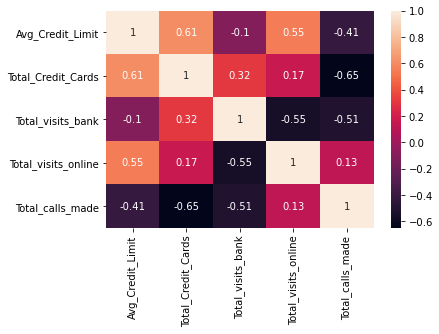

In [10]:
sns.heatmap(data_scaled.corr(), annot = True) # to check out the correlation between the variables

the heat map shows a weak correlation between the attributes and a big independency.

# Univariate Analysis

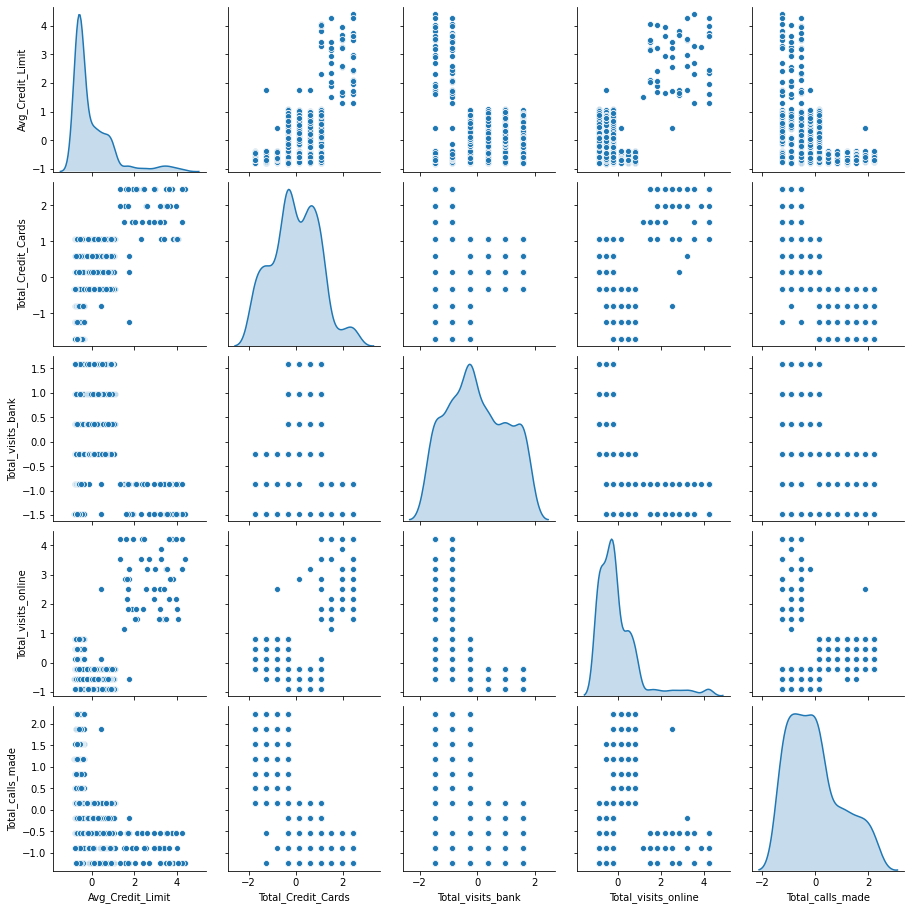

In [11]:
# check out for the natural distribution of the variables,
# and to have an idea about the # of clusters

sns.pairplot(data_scaled, diag_kind='kde') 

from the histograms of the attaibutes, the ideal # of clusters maybe 3 or 4 clusters

# Execute K-means clustering

In [12]:
#now will use KMeans clustering to group data based on their attribute

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

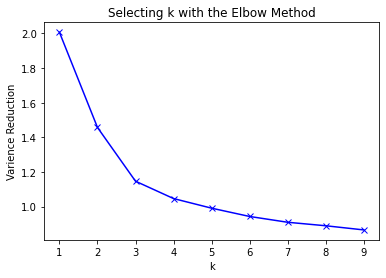

In [13]:
#Finding optimal no. of clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,10)
var_dec=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data_scaled)
    prediction=model.predict(data_scaled)
    var_dec.append(sum(np.min(cdist(data_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / data_scaled.shape[0])


plt.plot(clusters, var_dec, 'bx-')
plt.xlabel('k')
plt.ylabel('Varience Reduction')
plt.title('Selecting k with the Elbow Method')

the Elbow graph shows that our previous assumption about # of clusters to be 3 or 4, is correct. But the elbow bend is very clear at 3, so we will group this dataset into 3 clusters.

In [14]:
# No. of clusters, K = 3
model_K3=KMeans(3)
model_K3.fit(data_scaled)
prediction=model_K3.predict(data_scaled)
prediction

array([1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [15]:
# append the prediction to the original dataset
data["CLUSTER"] = prediction
data_attr["CLUSTER"] = prediction
data_scaled["CLUSTER"] = prediction
data.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,CLUSTER
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,0
2,3,17341,50000,7,1,3,4,1
3,4,40496,30000,5,1,1,4,1
4,5,47437,100000,6,0,12,3,2
5,6,58634,20000,3,0,1,8,0
6,7,48370,100000,5,0,11,2,2
7,8,37376,15000,3,0,1,1,0
8,9,82490,5000,2,0,2,2,0
9,10,44770,3000,4,0,1,7,0


In [16]:
# distribution of the data among the three clusters
data_attr.groupby(['CLUSTER']).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
CLUSTER,,,,,
0,"12,174.11",2.41,0.93,3.55,6.87
1,"33,782.38",5.52,3.49,0.98,2.00
2,"141,040.00",8.74,0.60,10.90,1.08


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E274C5A430>,
      dtype=object)

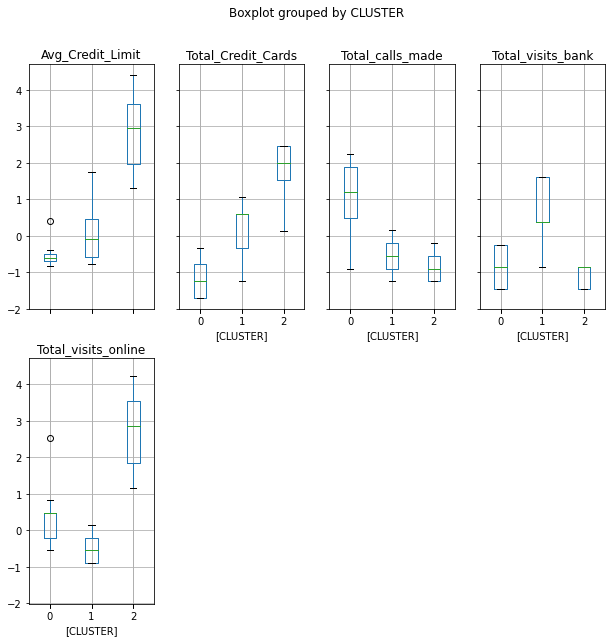

In [17]:
# plotting Boxplot
data_scaled.boxplot(by='CLUSTER', layout = (2,4),figsize=(10,10))

# Silhouette score

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
silhouette_score(data_scaled,prediction)

0.5397786437631975

# Execute hierarchical clustering

In [20]:
data.drop(['CLUSTER'],axis=1,inplace=True)
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [21]:
data_attr2=data.iloc[:,2:]
data_attr2.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [22]:
data_scaled2=data_attr2.apply(zscore)
data_scaled2.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.74,-1.25,-0.86,-0.55,-1.25
1,0.41,-0.79,-1.47,2.52,1.89
2,0.41,1.06,-0.86,0.13,0.15
3,-0.12,0.14,-0.86,-0.55,0.15
4,1.74,0.60,-1.47,3.20,-0.20


In [23]:
from sklearn.cluster import AgglomerativeClustering

# using Average linkage
model_HC3 = AgglomerativeClustering(affinity='euclidean',  linkage='average')
model_HC3.fit(data_scaled2)

#data['CLUSTER'] = model_HC3.labels_
#data.head(10)


AgglomerativeClustering(linkage='average')

In [24]:
data_attr2['CLUSTER'] = model_HC3.labels_
data_attr2.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,CLUSTER
0,100000,2,1,1,0,0
1,50000,3,0,10,9,0
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1
5,20000,3,0,1,8,0
6,100000,5,0,11,2,1
7,15000,3,0,1,1,0
8,5000,2,0,2,2,0
9,3000,4,0,1,7,0


In [25]:
#data_scaled2.head()

cophenet index= 0.8977080867389372


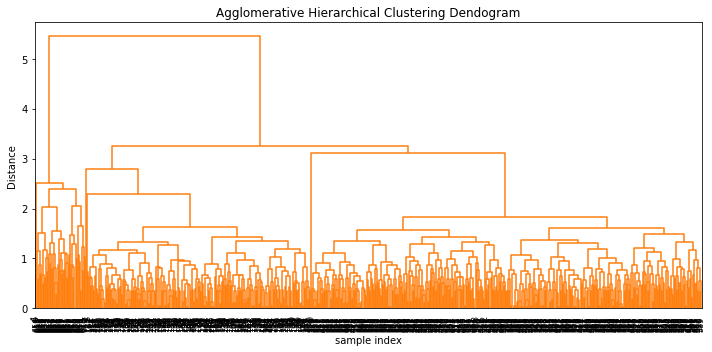

In [26]:
# plot dendrogram and find the cophenet index
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  

z = linkage(data_scaled2, metric='euclidean', method='average')
c, coph_dists = cophenet(z , pdist(data_scaled2))

print('cophenet index=',c)

plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E275F55130>,
      dtype=object)

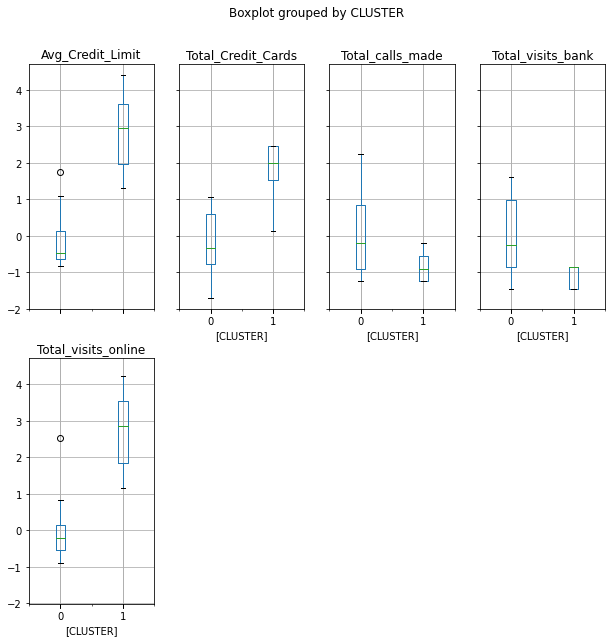

In [27]:
# plotting Boxplot
data_scaled2['CLUSTER'] = model_HC3.labels_
data_scaled2.boxplot(by='CLUSTER', layout = (2,4),figsize=(10,10))

# Silhouette score

In [28]:
silhouette_score(data_scaled2,model_HC3.labels_)

0.5778491354896657

cophenet index= 0.8637064913676973


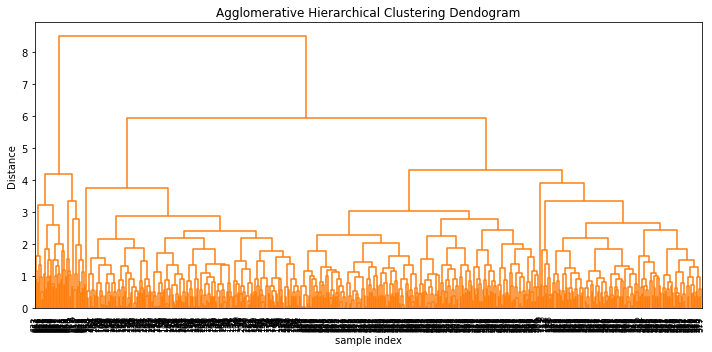

In [29]:
# # using complete linkage
z = linkage(data_scaled2, metric='euclidean', method='complete')
c, coph_dists = cophenet(z , pdist(data_scaled2))

print('cophenet index=',c)

plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E275F918E0>,
      dtype=object)

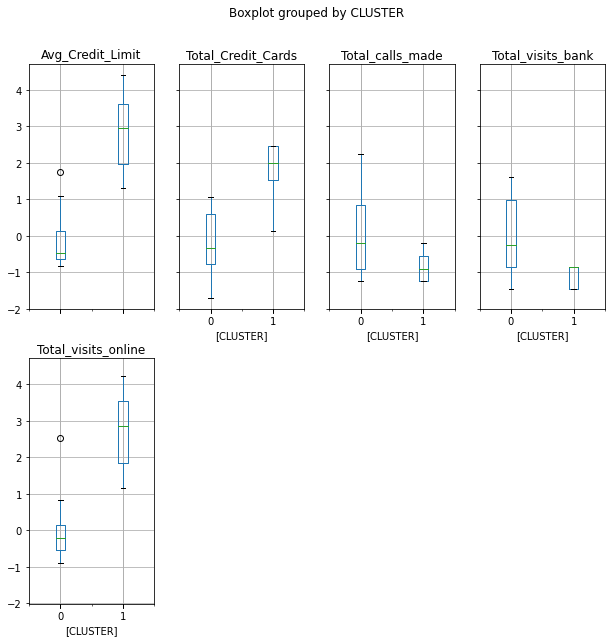

In [30]:
# plotting Boxplot
data_scaled2['CLUSTER'] = model_HC3.labels_
data_scaled2.boxplot(by='CLUSTER', layout = (2,4),figsize=(10,10))

# Silhouette score

In [31]:
silhouette_score(data_scaled2,model_HC3.labels_)

0.5778491354896657

cophenet index= 0.7424167463364741


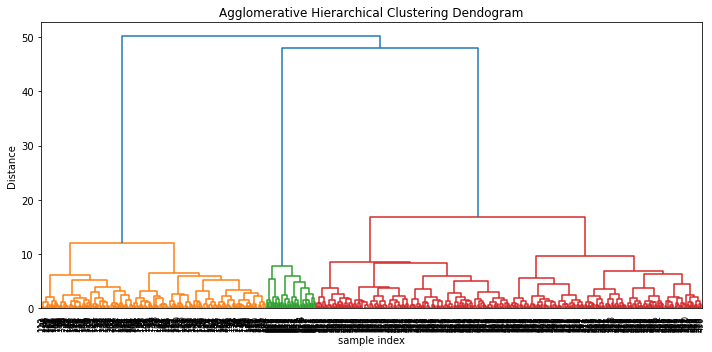

In [32]:
# # using ward linkage
z = linkage(data_scaled2, metric='euclidean', method='ward')
c, coph_dists = cophenet(z , pdist(data_scaled2))

print('cophenet index=',c)

plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E277B334C0>,
      dtype=object)

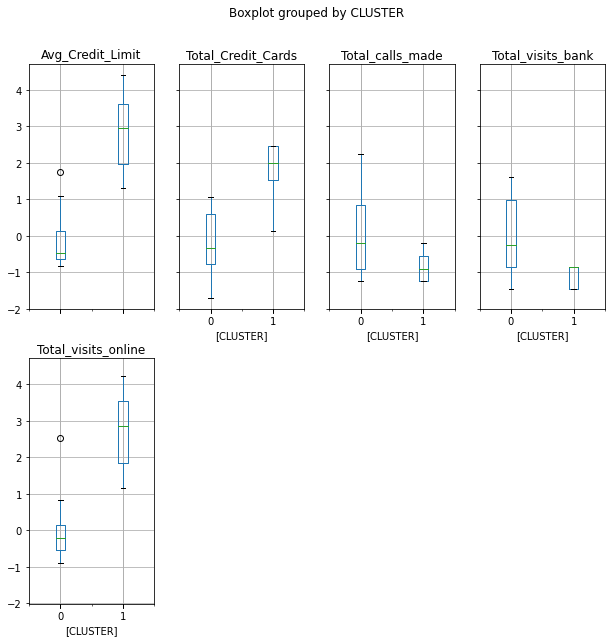

In [33]:
# plotting Boxplot
data_scaled2['CLUSTER'] = model_HC3.labels_
data_scaled2.boxplot(by='CLUSTER', layout = (2,4),figsize=(10,10))

# Silhouette score

In [34]:
silhouette_score(data_scaled2,model_HC3.labels_)

0.5778491354896657

# Compare K-means clusters with Hierarchical clusters

in KMeans, # of clusters = 3, silhouette_score = 54%

in hierarchical # of clusters = 2, silhouette_score = 58%, max cophenetic index = 89.7%

hierarchical clustering is slightly better than KMeans


